In [ ]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

%matplotlib inline

##Упражнение 1
- Реализуйте функцию plot_horizontal_bar, рисующую горизонтальные bar'ы

In [ ]:
def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
  fig, ax = plt.subplots(figsize=figsize)
  ax.barh(np.arange(len(bars_length)), bars_length, color='#a5c8e1')
  for index, data in enumerate(bars_length):
    plt.text(x=data if data>0 else 0, y=index-0.15, s=labels[index], fontdict=dict(fontsize=30))
  plt.yticks(np.arange(len(bars_length)), yticks_labels, fontsize=30)
  plt.xticks(fontsize=30)
  plt.grid(True)
  plt.show

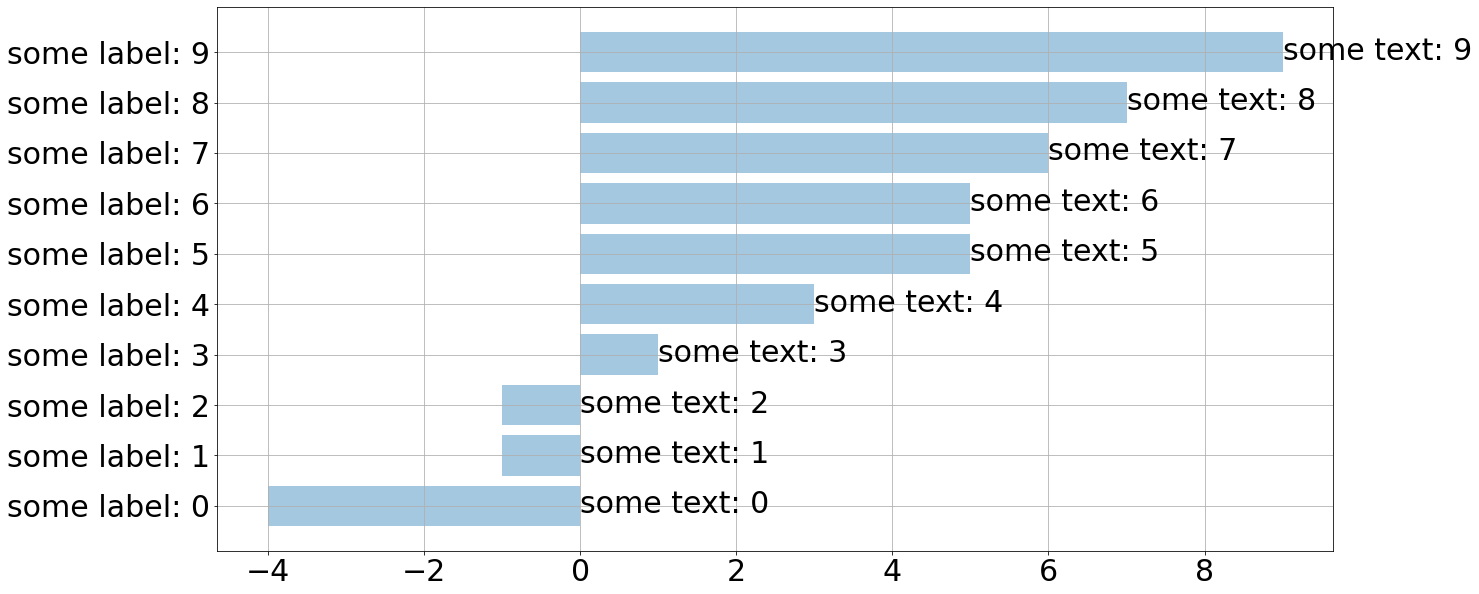

In [ ]:
# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

##Упражнение 2
- Реализуйте функцию plot_time_probabilities, рисующую изменяющиеся во времени вероятности неких событий.
- Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [ ]:
def plot_time_probabilities(probabilities_in_time, figsize):
  mycolors = ['#3b4cc0', '#5d7ce6', '#82a6fb', '#aac7fd', '#cdd9ec', '#ead4c8', '#f7b89c', '#f18d6f', '#d95847', '#b40426']
  fig, ax = plt.subplots(figsize=figsize)
  labels = ['Probability: ' + str(i) for i in range(len(probabilities_in_time.columns))]
  x = probabilities_in_time.index
  y = np.vstack([probabilities_in_time[i] for i in range(probabilities_in_time.shape[1])])
  ax.stackplot(x, y, colors=mycolors, labels=labels)
  plt.legend(loc='lower left', prop={'size': 15})
  plt.yticks(fontsize=15)
  plt.xticks(fontsize=15)
  plt.grid(axis='x')
  plt.show()


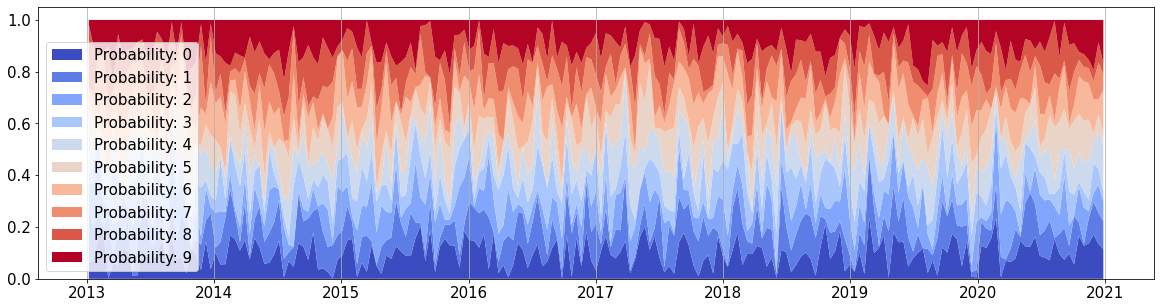

In [ ]:
# Сигнатура функции и пример вывода:

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)

##Упражнение 3

- Реализуйте функцию plot_intraday_ts, рисующую тепловую карту по временному ряду с внутридневными данными

In [56]:
df

,0,date,time
2020-02-01 00:00:00,47.616556,2020-02-01,00:00:00
2020-02-01 01:00:00,47.616556,2020-02-01,01:00:00
2020-02-01 02:00:00,47.616556,2020-02-01,02:00:00
2020-02-01 03:00:00,47.616556,2020-02-01,03:00:00
2020-02-01 04:00:00,47.616556,2020-02-01,04:00:00
...,...,...,...
2020-06-30 20:00:00,47.616556,2020-06-30,20:00:00
2020-06-30 21:00:00,47.616556,2020-06-30,21:00:00
2020-06-30 22:00:00,47.616556,2020-06-30,22:00:00
2020-06-30 23:00:00,47.616556,2020-06-30,23:00:00


In [72]:
def plot_intraday_ts(intraday_ts, figsize):
  fig, ax = plt.subplots(figsize=figsize)
  df = intraday_ts.to_frame()
  df.fillna(df.mean(), inplace=True)
  df.insert(1, 'date', df.index.date)
  df.insert(2, 'time', df.index.time)

  cs = plt.pcolor(df.pivot_table(index = ['time'], columns = 'date', values = 0, aggfunc = 'mean'),
                cmap='RdBu_r', edgecolors='white', linewidth=1)
  x_label = pd.date_range(df.date.min(), df.date.max()).strftime('%B %d').to_list()
  y_label = pd.date_range(str(df.time.min()), str(df.time.max()), freq='1H').strftime('%H:%M').to_list()
  plt.xticks(range(1, len(x_label), 2), x_label[1::2], fontsize=9, rotation=40)
  plt.yticks(range(1, len(y_label), 2), y_label[1::2], fontsize=10)
  ax.yaxis.tick_right()
  plt.xlabel('Дата', fontsize=15)
  plt.ylabel('Время', fontsize=15)
  fig.colorbar(cs, ax=[ax], location='left', pad = 0.03)
  plt.show()

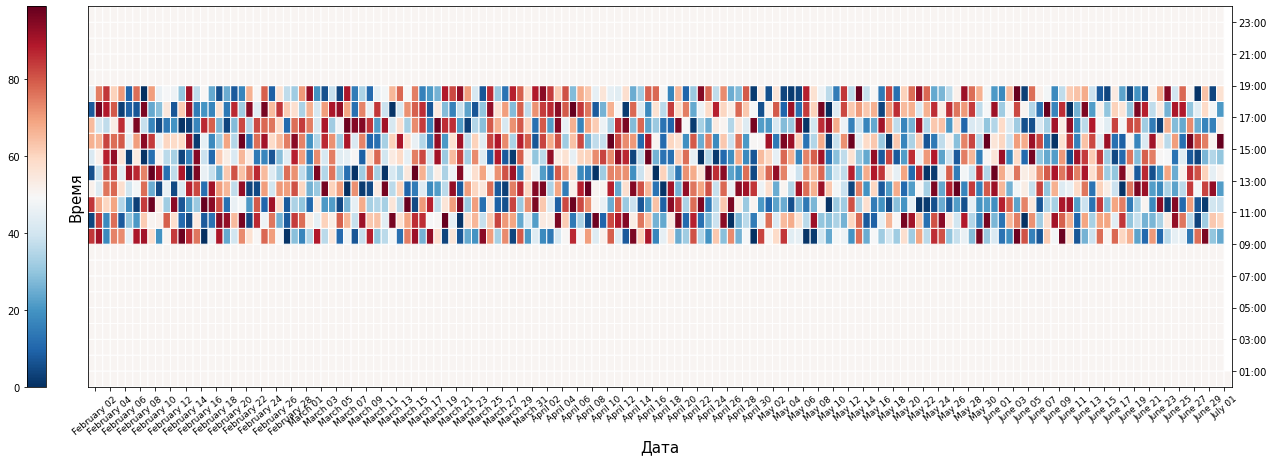

In [73]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)


plot_intraday_ts(intraday_ts, figsize)